In [16]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
"""))

In [2]:
import numpy as np
import pandas as pd # read_csv, # get_dummies : 원핫인코딩
import tensorflow.keras.utils as utils  # 원핫인코딩
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

# 원핫인코딩의 방법이 2가지

In [3]:
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_y = redwine.iloc[:,-1]
print(redwine_y.unique())
redwine_y = pd.get_dummies(redwine_y).to_numpy()
redwine_y

[5 6 7 4 8 3]


array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [4]:
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_y = redwine.iloc[:,-1]
print(redwine_y.unique())
redwine_y = utils.to_categorical(redwine_y)
redwine_y[:5]

[5 6 7 4 8 3]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 2s 304ms/step - loss: 1.7824 - accuracy: 0.1726 - val_loss: 1.6677 - val_accuracy: 0.3125
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 1.6469 - accuracy: 0.3559 - val_loss: 1.5534 - val_accuracy: 0.3616
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 1.5255 - accuracy: 0.3899 - val_loss: 1.4548 - val_accuracy: 0.3705
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 1.4258 - accuracy: 0.4025 - val_loss: 1.3683 - val_accuracy: 0.4062
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 1.3626 - accuracy: 0.4091 - val_loss: 1.2950 - val_accuracy: 0.4286
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2632 - accuracy: 0.4799 - val_loss: 1.2345 - val_accuracy: 0.4464
Epoch 7/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2217 - accuracy: 0.4747 - val_loss: 1.1871 - val_accura

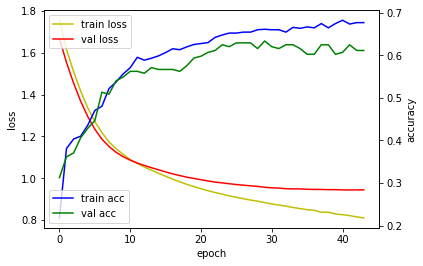

In [5]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy() # 6개 분류로 나눠짐
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique()) # 결과가 5 6 7 4 8 3 등급

# scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
redwine_y = pd.get_dummies(redwine_y).to_numpy() # 3등급의 경우 [1 0 0 0 0 0]
# redwine_y = utils.to_categorical(redwine_y) # 3등급의 경우 [0 0 0 1 0 0 0 0 0]

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
# model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(6, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Recall()])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Precision()])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=2)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [6]:
np.argmax(model.predict(scaler.transform(test_X)), axis=1)+3 # 예측치

array([5, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 5, 5, 6,
       7, 7, 7, 7, 7, 7, 5, 7, 6, 7, 6, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 6, 7, 6, 7, 6, 7, 7, 7,
       7, 7, 5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 5, 6,
       7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       6, 7, 7, 7, 7, 5, 7, 7, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6,
       7, 7, 7, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 6, 7, 6, 7, 7, 6,
       7, 7, 7, 7, 5, 7, 6, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       6, 7, 7, 7, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7,

In [7]:
import numpy as np
# 각 클래스별 확률을 출력하므로 argmax를 이용해서 가장 큰 인덱스를 값으로
pred = np.argmax(model.predict(scaler.transform(test_X)), axis=1)+3
ct = pd.crosstab(np.argmax(test_Y, axis=1)+3, pred)
ct.index.name = 'real'
ct.columns.name = 'predict'
ct

predict,5,6,7
real,,,
3,0,1,1
4,0,2,19
5,6,31,170
6,10,21,164
7,2,6,44
8,0,0,3


In [8]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 681us/step - loss: 0.8332 - accuracy: 0.6667
loss :  0.8332328200340271
accuracy :  0.6666666865348816


# redwine_y = utils.to_categorical(redwine_y)

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 1s 58ms/step - loss: 2.0561 - accuracy: 0.2731 - val_loss: 1.9247 - val_accuracy: 0.4062
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8676 - accuracy: 0.4543 - val_loss: 1.7435 - val_accuracy: 0.5402
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 1.6965 - accuracy: 0.5203 - val_loss: 1.5723 - val_accuracy: 0.5268
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 1.5348 - accuracy: 0.5244 - val_loss: 1.4255 - val_accuracy: 0.5312
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 1.4116 - accuracy: 0.5156 - val_loss: 1.3175 - val_accuracy: 0.5491
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 1.3052 - accuracy: 0.5310 - val_loss: 1.2477 - val_accuracy: 0.5625
Epoch 7/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2365 - accuracy: 0.5518 - val_loss: 1.2046 - val_accurac

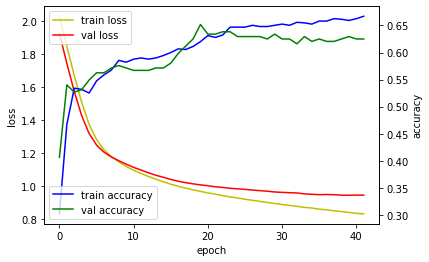

In [9]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy() # 6개 분류로 나눠짐
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique()) # 결과가 5 6 7 4 8 3 등급

# scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
# redwine_y = pd.get_dummies(redwine_y).to_numpy()
redwine_y = utils.to_categorical(redwine_y)

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
# model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(9, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Recall()])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Precision()])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=2)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train accuracy')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [10]:
fit_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
pred = np.argmax(model.predict(scaler.transform(test_X)), axis=1)
ct = pd.crosstab(np.argmax(test_Y, axis=1), pred)
ct.index.name="real"
ct.columns.name="predict"
ct

predict,5,6
real,,
3,1,1
4,0,21
5,6,201
6,8,187
7,1,51
8,0,3


In [12]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 662us/step - loss: 0.8480 - accuracy: 0.6586
loss :  0.8480461835861206
accuracy :  0.6586237549781799


# scale 조정 안 함

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 1s 50ms/step - loss: 7.8943 - accuracy: 0.0315 - val_loss: 2.7183 - val_accuracy: 0.0357
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 2.3249 - accuracy: 0.1784 - val_loss: 1.7528 - val_accuracy: 0.2679
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 1.6718 - accuracy: 0.2713 - val_loss: 1.4198 - val_accuracy: 0.4643
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 1.3729 - accuracy: 0.4365 - val_loss: 1.3318 - val_accuracy: 0.4866
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2743 - accuracy: 0.4917 - val_loss: 1.3337 - val_accuracy: 0.4464
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 1.2881 - accuracy: 0.4676 - val_loss: 1.2766 - val_accuracy: 0.4821
Epoch 7/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2487 - accuracy: 0.4733 - val_loss: 1.2710 - val_accuracy

Epoch 59/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0871 - accuracy: 0.5209 - val_loss: 1.1451 - val_accuracy: 0.4821
Epoch 60/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0878 - accuracy: 0.5254 - val_loss: 1.1410 - val_accuracy: 0.4911
Epoch 61/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0984 - accuracy: 0.5179 - val_loss: 1.1563 - val_accuracy: 0.4911
Epoch 62/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0899 - accuracy: 0.5165 - val_loss: 1.1367 - val_accuracy: 0.5045
Epoch 63/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0829 - accuracy: 0.5193 - val_loss: 1.1513 - val_accuracy: 0.4777
Epoch 64/500
5/5 [==============================] - 0s 10ms/step - loss: 1.1164 - accuracy: 0.5160 - val_loss: 1.1368 - val_accuracy: 0.5089
Epoch 65/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0835 - accuracy: 0.5235 - val_loss: 1.1424 - val_accuracy: 0.4955
Epoch 66/500


5/5 [==============================] - 0s 10ms/step - loss: 1.0172 - accuracy: 0.5563 - val_loss: 1.0777 - val_accuracy: 0.5625
Epoch 118/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0248 - accuracy: 0.5699 - val_loss: 1.1060 - val_accuracy: 0.5089
Epoch 119/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0527 - accuracy: 0.5273 - val_loss: 1.0678 - val_accuracy: 0.5536
Epoch 120/500
5/5 [==============================] - 0s 11ms/step - loss: 0.9950 - accuracy: 0.5754 - val_loss: 1.0868 - val_accuracy: 0.5357
Epoch 121/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0173 - accuracy: 0.5640 - val_loss: 1.0694 - val_accuracy: 0.5357
Epoch 122/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0036 - accuracy: 0.5702 - val_loss: 1.0663 - val_accuracy: 0.5268
Epoch 123/500
5/5 [==============================] - 0s 9ms/step - loss: 0.9629 - accuracy: 0.5778 - val_loss: 1.0718 - val_accuracy: 0.5402
Epoch 124/500
5/5 [==

Epoch 175/500
5/5 [==============================] - 0s 10ms/step - loss: 0.9438 - accuracy: 0.5901 - val_loss: 1.0202 - val_accuracy: 0.5580
Epoch 176/500
5/5 [==============================] - 0s 10ms/step - loss: 0.9041 - accuracy: 0.5981 - val_loss: 1.0114 - val_accuracy: 0.5804
Epoch 177/500
5/5 [==============================] - 0s 10ms/step - loss: 0.8994 - accuracy: 0.6207 - val_loss: 1.0080 - val_accuracy: 0.5625
Epoch 178/500
5/5 [==============================] - 0s 10ms/step - loss: 0.9027 - accuracy: 0.6072 - val_loss: 1.0050 - val_accuracy: 0.5759
Epoch 179/500
5/5 [==============================] - 0s 10ms/step - loss: 0.9285 - accuracy: 0.6085 - val_loss: 1.0038 - val_accuracy: 0.5804
Epoch 180/500
5/5 [==============================] - 0s 10ms/step - loss: 0.9203 - accuracy: 0.6144 - val_loss: 1.0145 - val_accuracy: 0.5625
Epoch 181/500
5/5 [==============================] - 0s 10ms/step - loss: 0.9057 - accuracy: 0.6032 - val_loss: 1.0124 - val_accuracy: 0.5670
Epoch 

5/5 [==============================] - 0s 10ms/step - loss: 0.8871 - accuracy: 0.6311 - val_loss: 0.9998 - val_accuracy: 0.5893
Epoch 233/500
5/5 [==============================] - 0s 10ms/step - loss: 0.8991 - accuracy: 0.6339 - val_loss: 1.0015 - val_accuracy: 0.5848


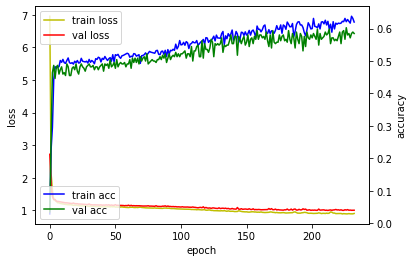

In [13]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy()
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique())
# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
redwine_y = pd.get_dummies(redwine_y).to_numpy()

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(6, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [14]:
import numpy as np
# 각 클래스별 확률을 출력하므로 argmax를 이용해서 가장 큰 인덱스를 값으로
pred = np.argmax(model.predict(test_X), axis=1)
ct = pd.crosstab(np.argmax(test_Y, axis=1)+3, pred+3)
ct.index.name = 'real'
ct.columns.name = 'predict'
ct

predict,5,6,7
real,,,
3,2,0,0
4,15,5,1
5,152,51,4
6,62,119,14
7,4,31,17
8,0,1,2


In [15]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 616us/step - loss: 0.9057 - accuracy: 0.6211
loss :  0.9056793451309204
accuracy :  0.6210902333259583
